In [2]:
import openpyxl
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

import statsmodels.api as sm

import itertools
import optuna

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')

C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
sm.tools.print_version.show_versions(show_dirs=True)
rcParams['figure.figsize'] = 12, 10


INSTALLED VERSIONS
------------------
Python: 3.7.2.final.0

statsmodels

Installed: 0.13.5 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels)

Required Dependencies

cython: 0.29.6 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\Cython)
numpy: 1.21.6 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\numpy)
scipy: 1.7.3 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\scipy)
pandas: 1.3.5 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\pandas)
    dateutil: 2.8.0 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\dateutil)
patsy: 0.5.6 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\patsy)

Optional Dependencies

matplotlib: 3.0.3 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\matplotlib)
    backend: module://ipykernel.pylab.backend_inline 
cvxopt: Not installed
joblib: 0.13.2 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\joblib)

Developer Tools

IPython: 7.3.0 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\IPython)
    jinja2: 2.10 (C

In [5]:
wb1 = openpyxl.load_workbook(r"data_sheets\Книга1.xlsx")
sheet = wb1['Лист4']

In [6]:
def df_test(frame_col):
    print('Результат теста:')
    df_result = adfuller(frame_col)
    df_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for result_value, label in zip(df_result, df_labels):
        print(label + ' : ' + str(result_value))

    if df_result[1] <= 0.05:
        print("Сильные доказательства против нулевой гипотезы, ряд является стационарным.")
        return True
    else:
        print("Слабые доказательства против нулевой гипотезы, ряд не является стационарным.")
        return False

In [11]:
start = datetime.datetime.now()
timer_train = []
timer_test = []
batch_train = []
batch_test = []
batch_train_1 = []
batch_test_1 = []
batch_train_2 = []
batch_test_2 = []
batch_train_3 = []
batch_test_3 = []
batch_train_4 = []
batch_test_4 = []
batch_train_5 = []
batch_test_5 = []
batch_train_6 = []
batch_test_6 = []
batch_train_7 = []
batch_test_7 = []

n = 18
border = 30000
num = 30530
for i in range (0, border-n):
    timer_train.append(pd.to_datetime((sheet.cell(row = i+n, column = 8).value)))
    batch_train.append(float(sheet.cell(row = i+n, column = 1).value))
    batch_train_1.append(float(sheet.cell(row = i+n, column = 2).value))
    batch_train_2.append(float(sheet.cell(row = i+n, column = 5).value))
    batch_train_3.append(float(sheet.cell(row = i+n, column = 6).value))
    batch_train_4.append(float(sheet.cell(row = i+n, column = 4).value))
    batch_train_5.append(float(sheet.cell(row = i+n, column = 3).value))
    batch_train_6.append(float(sheet.cell(row = i+n, column = 7).value))
    batch_train_7.append(float(sheet.cell(row = i+n, column = 9).value))
for j in range (border-n, num-n):
    timer_test.append(pd.to_datetime((sheet.cell(row = i+n, column = 2).value)))
    batch_test.append(float(sheet.cell(row = j+n, column = 1).value))
    batch_test_1.append(float(sheet.cell(row = j+n, column = 2).value))
    batch_test_2.append(float(sheet.cell(row = j+n, column = 5).value))
    batch_test_3.append(float(sheet.cell(row = j+n, column = 6).value))
    batch_test_4.append(float(sheet.cell(row = j+n, column = 4).value))
    batch_test_5.append(float(sheet.cell(row = j+n, column = 3).value))
    batch_test_6.append(float(sheet.cell(row = j+n, column = 7).value))
    batch_test_7.append(float(sheet.cell(row = j+n, column = 9).value))


Результат теста:
ADF Test Statistic : -3.093734560905504
p-value : 0.02702034700266399
#Lags Used : 49
Number of Observations Used : 29932
Сильные доказательства против нулевой гипотезы, ряд является стационарным.
Результат теста:
ADF Test Statistic : -2.496047005408416
p-value : 0.11643909605296027
#Lags Used : 47
Number of Observations Used : 29934
Слабые доказательства против нулевой гипотезы, ряд не является стационарным.
Результат теста:
ADF Test Statistic : -2.906840711165638
p-value : 0.04455827914485089
#Lags Used : 45
Number of Observations Used : 29936
Сильные доказательства против нулевой гипотезы, ряд является стационарным.
Результат теста:
ADF Test Statistic : -2.9729898616655417
p-value : 0.037494961087999094
#Lags Used : 50
Number of Observations Used : 29931
Сильные доказательства против нулевой гипотезы, ряд является стационарным.
Результат теста:
ADF Test Statistic : -2.8970090643804305
p-value : 0.045696909716795624
#Lags Used : 47
Number of Observations Used : 29934

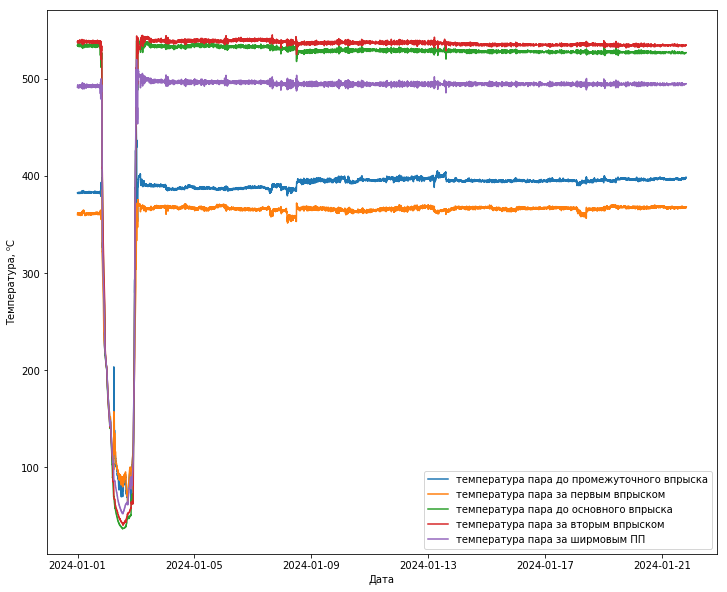

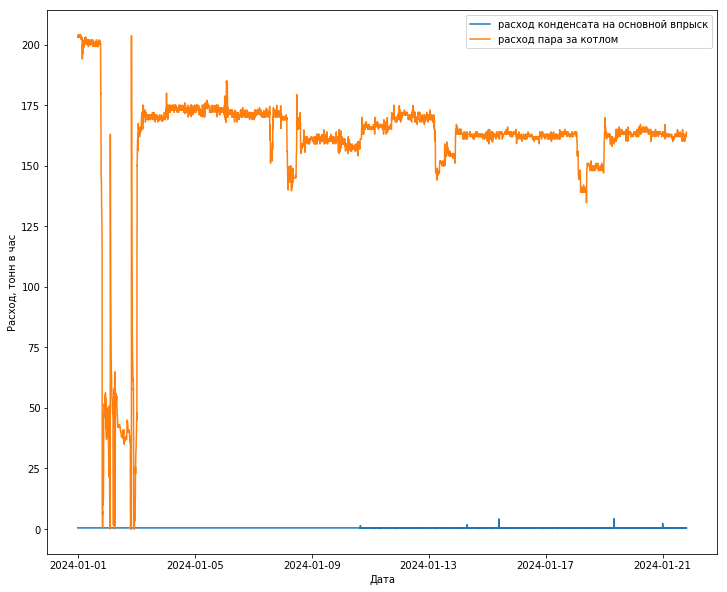

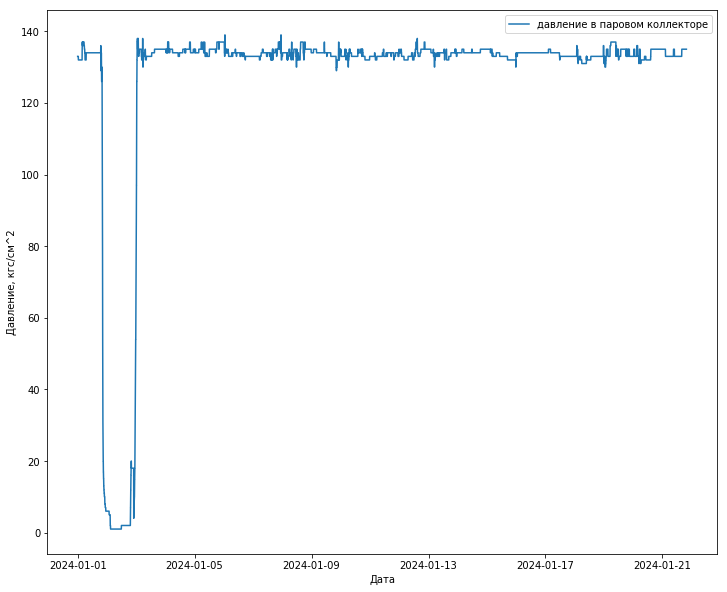

In [13]:
df1 =  pd.DataFrame(columns = ["temp1", "temp2", "temp3", "temp4","temp5", "flow1", "flow2", "pres1"])
df1.temp1 = batch_train
df1.temp2 = batch_train_1
df1.temp3 = batch_train_2
df1.temp4 = batch_train_3
df1.temp5 = batch_train_4
df1.flow1 = batch_train_5
df1.flow2 = batch_train_6
df1.pres1 = batch_train_7

df_test(df1['temp1'])
df_test(df1['temp2'])
df_test(df1['temp3'])
df_test(df1['temp4'])
df_test(df1['temp5'])
df_test(df1['flow1'])
df_test(df1['flow2'])
df_test(df1['pres1'])

df1.index = pd.date_range(start='2024-01-01 00:00:00', periods = len(df1['temp1']), freq='min')
df1_diff = df1.diff().dropna()
df1_diff.index = pd.date_range(start='2024-01-01 00:00:00', periods = len(df1_diff['temp1']), freq='min')

fig, ax = plt.subplots()
ax.set_ylabel('Температура, ⁰C')
ax.set_xlabel ('Дата')
ax.plot(df1['temp1'], label = "температура пара до промежуточного впрыска")
ax.plot(df1['temp2'], label = "температура пара за первым впрыском")
ax.plot(df1['temp3'], label = "температура пара до основного впрыска")
ax.plot(df1['temp4'], label = "температура пара за вторым впрыском")
ax.plot(df1['temp5'], label = "температура пара за ширмовым ПП")
ax.legend()

fig, ap = plt.subplots()
ap.set_ylabel('Расход, тонн в час')
ap.set_xlabel ('Дата')
ap.plot(df1['flow1'], label = "pасход конденсата на основной впрыск")
ap.plot(df1['flow2'], label = "pасход пара за котлом")
ap.legend()

fig, af = plt.subplots()
af.set_ylabel('Давление, кгс/см^2')
af.set_xlabel ('Дата')
af.plot(df1['pres1'], label = "давление в паровом коллекторе")
af.legend()

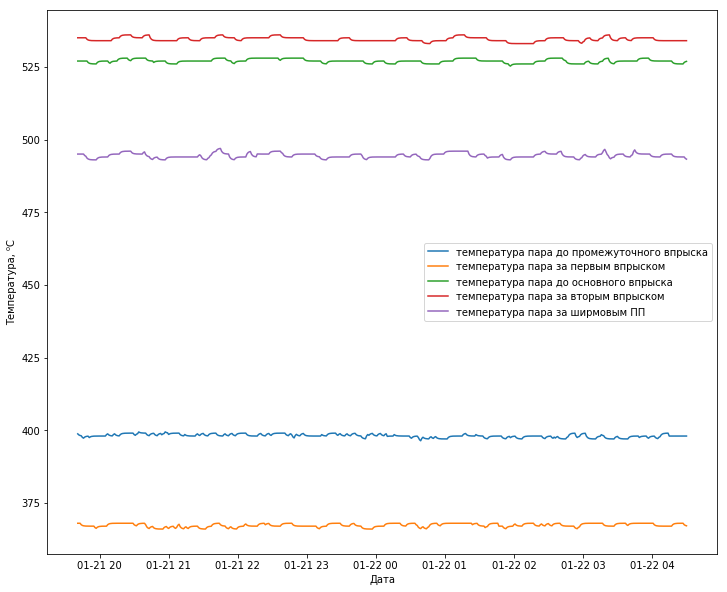

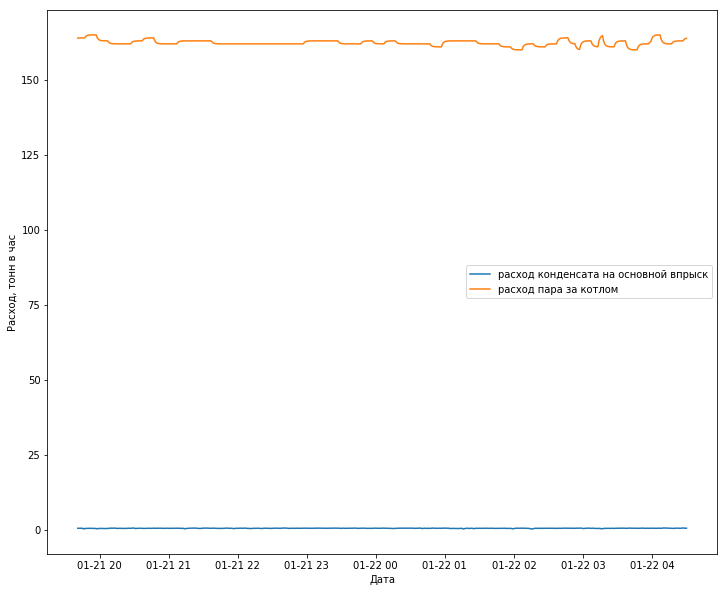

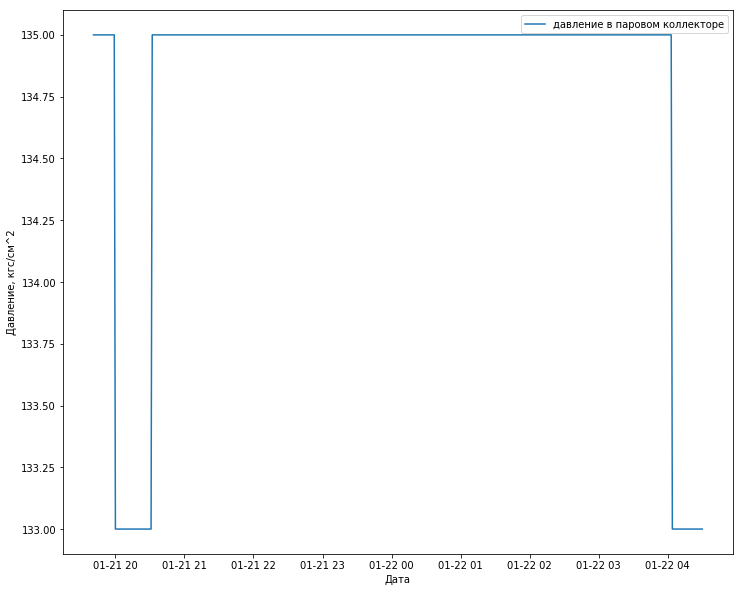

In [25]:
df2 =  pd.DataFrame(columns = ["temp1", "temp2", "temp3", "temp4","temp5", "flow1", "flow2", "pres1"])

df2.temp1 = batch_test
df2.temp2 = batch_test_1
df2.temp3 = batch_test_2
df2.temp4 = batch_test_3
df2.temp5 = batch_test_4
df2.flow1 = batch_test_5
df2.flow2 = batch_test_6
df2.pres1 = batch_test_7


df2.index = pd.date_range(start='2024-01-21 19:41:00', periods = len(df2['flow1']), freq='min')

fig, ax = plt.subplots()
ax.set_ylabel('Температура, ⁰C')
ax.set_xlabel ('Дата')
ax.plot(df2['temp1'], label = "температура пара до промежуточного впрыска")
ax.plot(df2['temp2'], label = "температура пара за первым впрыском")
ax.plot(df2['temp3'], label = "температура пара до основного впрыска")
ax.plot(df2['temp4'], label = "температура пара за вторым впрыском")
ax.plot(df2['temp5'], label = "температура пара за ширмовым ПП")
ax.legend()

fig, ap = plt.subplots()
ap.set_ylabel('Расход, тонн в час')
ap.set_xlabel ('Дата')
ap.plot(df2['flow1'], label = "pасход конденсата на основной впрыск")
ap.plot(df2['flow2'], label = "pасход пара за котлом")
ap.legend()

fig, af = plt.subplots()
af.set_ylabel('Давление, кгс/см^2')
af.set_xlabel ('Дата')
af.plot(df2['pres1'], label = "давление в паровом коллекторе")
af.legend()

In [321]:
period = 1440
fit1 = ExponentialSmoothing(
    df1['temp5'],
    use_boxcox=False,
    damped_trend=True,
    initialization_method="heuristic",
    seasonal_periods = period,
    trend="add",
    seasonal="add",
).fit()


In [322]:
forecast1 = fit1.forecast(len(df2['temp5']))

In [323]:
predictions1 = pd.Series(forecast1.values, index=df2["temp5"].index)

In [324]:
#difference = np.mean(predictions1 - df2['temp1'])
forecast_mse1 = np.sqrt(((predictions1 - df2['temp5']) ** 2).mean())
print(forecast_mse1)

28.79101672913614


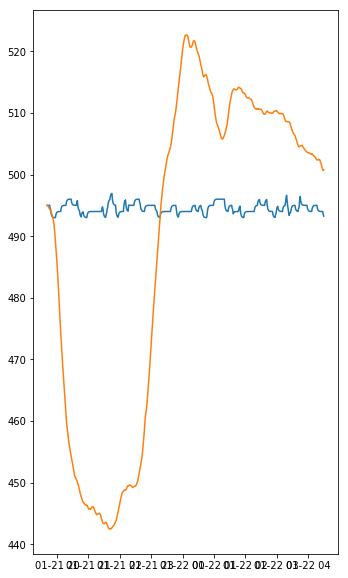

In [325]:
  
figure = pylab.subplot(1,2,2)
figure1 = pylab.plot(df2['temp5'], label = "истинные значения")
figure2 = pylab.plot(predictions1, label = "прогноз 1")